# Assignment 2
Roll num 21111038 <br/>
This code takes 4 mins to run


## Question 1) Linear Regression

Importing the Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import ceil
import math

Vanila gradient descent code mentioned in question

In [2]:
def gradient_descent(gradient,init_,learn_rate, n_iter=50, tol=1e-06):
    x = init_
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

### Question 1.a) Finding Minima for given functions
Using the above function for finding minima<br/>
i)Finding Minima for $ f(x) = x^2 + 3x + 4 $

We need to find the derivative of f(x): 
$$\frac{\partial f(x)}{\partial x} = 2x + 3$$

Thus we will pass gradient=lambda v: 2*v + 3 to the gradient_descent function 

Minima for the function x^2 + 3x + 4 is: -1.5. 
And its corresponding value is 1.75
Visualizing the function


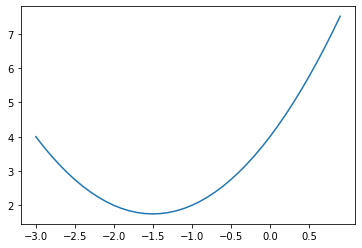

In [3]:
minima_x1_coordinate = gradient_descent(gradient=lambda v:2*v + 3, init_=4.0, learn_rate=0.2) 
f1_x = lambda x: x*x + 3*x +4
minima_y1_coordinate = f1_x(minima_x1_coordinate)
print(f"Minima for the function x^2 + 3x + 4 is: {minima_x1_coordinate}. \nAnd its corresponding value is {minima_y1_coordinate}")
print("Visualizing the function")
x = np.arange(-3, 1, 0.1)
y = f1_x(x)
x_tick = np.arange(-3,1,0.5)
plt.xticks(x_tick)
plt.plot(x, y)
plt.show()

ii)Finding Minima for $ g(x) = x^4 - 3x^2 + 2x $

We need to find the derivative of g(x): 
$$\frac{\partial g(x)}{\partial x} = 4x^3 - 6x + 2$$

Thus we will pass gradient=lambda v: (4 * (v ** 3)) - (6 * v) + 2 to the gradient_descent function 

Minima for the function x^4 - 3x^2 + 2*x  when initial values are on right side of local minima: 1.0. 
 And its corresponding value is 0.0
Minima for the function x^4 - 3x^2 + 2*x  when initial values are on left side of local minima: -1.366. 
 And its corresponding value is -4.848076206064. 
 Thus we got two minimas
Global minima is at -1.366
Visualizing the function


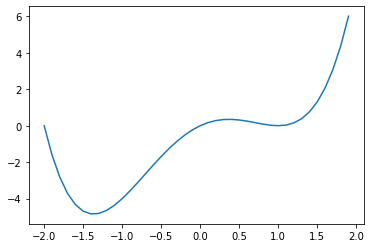

In [4]:
minima_x2_coordinate = gradient_descent(gradient=lambda v: (4*(v ** 3))-(6*v) + 2, n_iter=300,init_=5.0, learn_rate=0.004) 
g_x = lambda x: x**4 - 3*x**2 + 2*x
minima_y2_coordinate = g_x(minima_x2_coordinate)
print(f"Minima for the function x^4 - 3x^2 + 2*x  when initial values are on right side of local minima: {minima_x2_coordinate}. \n \
And its corresponding value is {minima_y2_coordinate}")

minima_x3_coordinate = gradient_descent(gradient=lambda v: (4*(v ** 3))-(6*v) + 2, n_iter=300,init_=0.0, learn_rate=0.004) 
minima_y3_coordinate = g_x(minima_x3_coordinate)
print(f"Minima for the function x^4 - 3x^2 + 2*x  when initial values are on left side of local minima: {minima_x3_coordinate}. \n \
And its corresponding value is {minima_y3_coordinate}. \n Thus we got two minimas")
print("Global minima is at -1.366")

print("Visualizing the function")
x = np.arange(-2, 2, 0.1)
y = g_x(x)
x_tick = np.arange(-3,3,0.5)
plt.xticks(x_tick)
plt.plot(x, y)
plt.show()

Thus for function 2, we found 2 minimas, one of which was local, and one was global. <br/>
Parameter initiazation and Learning rate decides which minima will the function converge to.

### 1.b) Writing code to find linear regressor


Value of the partial derivatives to update our weights for gradient descent will depend on how we define loss<br/>
For linear regression, we define loss as 
$$ Loss = \frac{1}{n} \sum_{i=1}^n(y_i-y\_pred_{i})^2 $$
Our linear regression is given as y = aX + b <br/>
Thus we need to find partial derivative of loss with respect to our weights a, b<br/>
Partial derivatives are given as
$$ d_a = \frac {\delta Loss}{\delta a} = \frac{-2}{n} \sum_{i=1}^{n}x_{i}(y_{i}-y\_pred_{i}) $$
$$ d_b = \frac {\delta Loss}{\delta b} = \frac{-2}{n} \sum_{i=1}^{n}(y_{i}-y\_pred_{i}) $$

Note: Here n = size taken in consideration for update, not the whole size <br/>
Thus for every iteration, our weight update will be 
$$ a = a - learningrate * d_a $$
$$ b = b - learningrate * d_b $$
We will do this updates for number of iteration, or if d_a or d_b value is too insignificant for an update.

- Note that for normal/batch gradient descent, whole data is processed before updating weights.


In [5]:
def initialize_parameters():
    # Simply return random parameters between 0 and 1 for weights
    return random.random(), random.random()

def predict_y(X, a, b):
    # This is Vectorized multiplication and addition.
    # Thats why no loop required
    # We use weights to predict y.
    y_pred = a*X + b
    return y_pred

def compute_gradient(X, y, y_pred, a, b):
    # Computing the gradient using the above formula
    # Calculating this everytime because last batch might be smaller than og batch size
    size_of_batch = len(X)

    D_a = (-2/size_of_batch) * sum(X * (y - y_pred))  # Derivative wrt m
    D_b = (-2/size_of_batch) * sum(y - y_pred)  # Derivative wrt c
    return D_a, D_b

def update_gradient(a, D_a, b, D_b, learning_rate):
    # Update the gradients 
    a -= (learning_rate * D_a)
    b -= (learning_rate * D_b)
    return a, b

def get_loss(y, y_pred):
    # Using the loss formula defined above
    return sum((y - y_pred)**2)/len(y)


def linear_regressor_gradients(X, Y, learning_rate=0.02, iterations=500, tol=1e-06):
    a,b = initialize_parameters()
    n = len(Y)
    loss = []
    for i in range(iterations):
        Y_pred = predict_y(X, a, b)
        D_a, D_b = compute_gradient(X, Y, Y_pred, a, b)
        
        a, b = update_gradient(a, D_a, b, D_b, learning_rate)
        
        loss.append(get_loss(Y, Y_pred))
        if (abs(D_a * learning_rate)<tol) or (abs(D_b * learning_rate)<tol):
            #print("Breaking at loop",i)
            break

    return a, b, loss

### 1.c) Generating Artificial Data and finding out best weight parameters

In [6]:
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3*X + res

Ideally We will Normalize our data, because normalization speeds up the process of gradient descent. Ref: [Wan, Xing. “Influence of Feature Scaling on Convergence of Gradient Iterative Algorithm.” Journal of Physics: Conference Series, vol. 1213, 2019, p. 032021., doi:10.1088/1742-6596/1213/3/032021. ](https://iopscience.iop.org/article/10.1088/1742-6596/1213/3/032021/pdf)
<br/>
But for sake of assignment, we will not normalize, because optimal value of a, b will change.  

Values for a and b are: 0.2953521178190145, 2.023115349547645
Thus the Equation of the line fitted is Y = 0.2953521178190145X + 2.023115349547645
Final loss is 2.2187210331077
Visualization of how loss decreases with each iteration


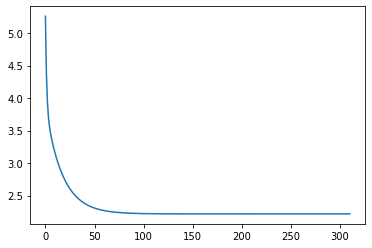

In [7]:
a, b, lossLR = linear_regressor_gradients(X, y)
print(f"Values for a and b are: {a}, {b}")
print(f"Thus the Equation of the line fitted is Y = {a}X + {b}")
print("Final loss is",lossLR[-1])
print("Visualization of how loss decreases with each iteration")
plt.plot(lossLR)
plt.show()


Visualizing the fitted line on the data


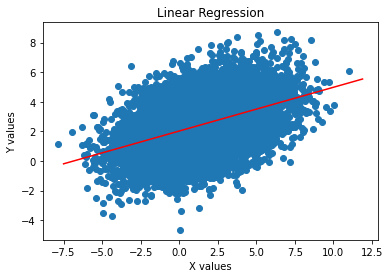

In [8]:
print("Visualizing the fitted line on the data")
line_X = np.arange(-7.5,12,0.2)
line_Y = a*line_X + b
plt.scatter(X, y)
plt.plot(line_X, line_Y,'r')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression')
plt.show()

NOTE: We know batch gradient is most likely to give optimal solution. So the loss we got here 2.2187 can be considered optimal, and we will consider loss below 2.24 acceptable going forward

### 1.d) Implementing Minibatch Stochaistic gradient descent using the code base developed so far

For Minibatch stochaistic gradient descent, we will use the functions we defined above. It's just that instead of passing all data, we will pass batches of data to the function. <br/>
Going forward, when we use term SGD or implement SGD, it will use code of mini batch with batch size = 1. <br/>
For batch selection, we are randomly choosing the index for batch

In [9]:
def mini_batch_gradient_descent(X, y, iterations=1000, batch_size=2000, learning_rate=0.01, tol=1e-06):
    total_size = len(X)
    num_of_batches = ceil(len(X) / batch_size) 
    #loss = []

    a, b = initialize_parameters()
    flag = False
    index_shuf = list(range(total_size))
    for i in range(iterations):
        
        # Getting a random integer. This integer is starting index of batch.
        ind = random.randint(0,total_size-batch_size)
        X_batch = X[ind:ind+batch_size]
        y_batch = y[ind:ind+batch_size]
        
        # Forward propagation
        y_batch_pred = predict_y(X_batch, a, b)
        
        # Gradient Calculation
        da, db= compute_gradient(X_batch, y_batch, y_batch_pred,a, b)
        
        # Checking if weight updates are less than tolerance level
        # If yes, we will break
        if (abs(da*learning_rate) < tol) or (abs(db * learning_rate)<tol):
            #print(f"breaking at iteration {i} due to low tolerance update")
            flag = True
            break
        a, b = update_gradient(a, da, b, db, learning_rate)
    
    y_pred = predict_y(X, a, b)
    loss= get_loss(y, y_pred)

    return a, b, loss



Batch size is 500
Values for a and b are: 0.31047632970644384, 1.9982215099045897
Thus the Equation of the line fitted is Y = 0.31047632970644384X + 1.9982215099045897
Final loss is 2.2201306639616414
Visualizing the fitted line on the data


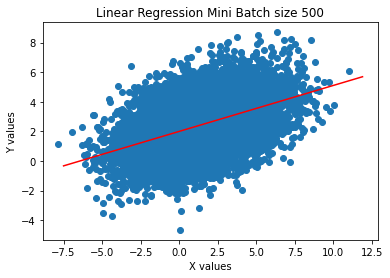

In [10]:
# A test function call to show the code working
a, b, lossMBLR = mini_batch_gradient_descent(X, y, iterations=10000, batch_size=500)
print(f"Batch size is 500")
print(f"Values for a and b are: {a}, {b}")
print(f"Thus the Equation of the line fitted is Y = {a}X + {b}")
print("Final loss is",lossMBLR)

print("Visualizing the fitted line on the data")
line_X = np.arange(-7.5,12,0.2)
line_Y = a*line_X + b
plt.scatter(X, y)
plt.plot(line_X, line_Y,'r')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Mini Batch size 500')
plt.show()

### 1.e) Finding out whether SGD Does better or Worse in terms of time performance
#### NOTE: SGD can be thought of as Specialized version of Minibatch Stochaistic Gradient Descent where Batch size = 1. We will be using this in our code

Values for a and b are: 0.2407515491267567, 1.9742022898383491
Thus the Equation of the line fitted is Y = 0.2407515491267567X + 1.9742022898383491
Final loss is 2.2201306639616414
Visualizing the fitted line on the data


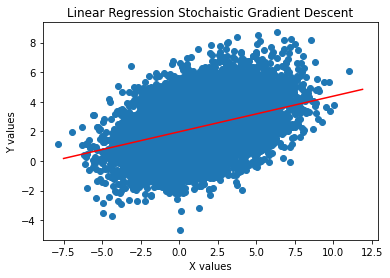

In [11]:
# SGD

a, b, lossSGD = mini_batch_gradient_descent(X, y, iterations=10000, batch_size=1, learning_rate=0.001, tol=1e-07)
print(f"Values for a and b are: {a}, {b}")
print(f"Thus the Equation of the line fitted is Y = {a}X + {b}")
print("Final loss is",lossMBLR)

print("Visualizing the fitted line on the data")
line_X = np.arange(-7.5,12,0.2)
line_Y = a*line_X + b
plt.scatter(X, y)
plt.plot(line_X, line_Y,'r')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Stochaistic Gradient Descent')
plt.show()

#### We will be considering a batch size of 200 ahead for for Mini batch analysis. We will find optimal batch later

Randomly sampling best alpha value
Range is to be 0.0001 to 0.1


#### Finding a good learning rate for Mini Batch size = 200
Also finding learning rate for size 500 and 2000 to see how learning rate behaves when size increases

NOTE: For Learning rate sampling we will be sampling it on logarithmic scale, instead of generating sample within range on range. Intuition: Suppose you uniformly find values between 0 to 1, here only 10% of values will come between 0 to 0.1 and 90% between 0.1 to 1. This is not suitable when finding learning rate, thats why its sampled on log scale
REF : [Learning Rate Sampling](https://stats.stackexchange.com/questions/291552/why-do-we-sample-from-log-space-when-optimizing-learning-rate-regularization-p)

In [12]:
a, b = 0.0001, 0.1
loga = math.log2(a)
logb = math.log2(b)
x= np.random.uniform(loga, logb,size=50)
learning_rate_samples = 2**x
learning_rate_lookup = []
for learning_rate in learning_rate_samples:
    a, b, loss = mini_batch_gradient_descent(X, y, iterations = 5000, batch_size=200, learning_rate=learning_rate, tol=1e-06)
    learning_rate_lookup.append([learning_rate, a, b, loss])
    #print(learning_rate, loss[-1])

In [13]:
learning_rate_lookup.sort(key= lambda x:x[-1])
print("TOP Five values for learning rates are")
for i in range(5):
    print(f"{i+1}: rate:{learning_rate_lookup[i][0]} ,loss:{learning_rate_lookup[i][-1]}")

TOP Five values for learning rates are
1: rate:0.00327327321608322 ,loss:2.2187723852721737
2: rate:0.0019648293640002036 ,loss:2.2187997810557185
3: rate:0.016926047986503923 ,loss:2.2188124246494763
4: rate:0.014780050446263989 ,loss:2.218812794172842
5: rate:0.0031468582829297606 ,loss:2.218837112173214


Ideal learning rate for size 200 is around 0.005

In [14]:
a, b = 0.0001, 0.1
loga = math.log2(a)
logb = math.log2(b)
x= np.random.uniform(loga, logb,size=50)
learning_rate_samples = 2**x
learning_rate_lookup = []
for learning_rate in learning_rate_samples:
    a, b, loss = mini_batch_gradient_descent(X, y, iterations = 5000, batch_size=500, learning_rate=learning_rate, tol=1e-06)
    learning_rate_lookup.append([learning_rate, a, b, loss])
    #print(learning_rate, loss[-1])

In [15]:
learning_rate_lookup.sort(key= lambda x:x[-1])
print("TOP Five values for learning rates are")
for i in range(5):
    print(f"{i+1}: rate:{learning_rate_lookup[i][0]} ,loss:{learning_rate_lookup[i][-1]}")

TOP Five values for learning rates are
1: rate:0.051110579917963556 ,loss:2.2188094244441228
2: rate:0.03396125293094913 ,loss:2.21882113739161
3: rate:0.010838208680220169 ,loss:2.2188222791922096
4: rate:0.009354693050294741 ,loss:2.218924891996941
5: rate:0.007580662539215299 ,loss:2.2189678194540354


Learning Rate for size 500 is around 0.01

In [16]:
a, b = 0.0001, 0.1
loga = math.log2(a)
logb = math.log2(b)
x= np.random.uniform(loga, logb,size=50)
learning_rate_samples = 2**x
learning_rate_lookup = []
for learning_rate in learning_rate_samples:
    a, b, loss = mini_batch_gradient_descent(X, y, iterations = 5000, batch_size=2000, learning_rate=learning_rate, tol=1e-06)
    learning_rate_lookup.append([learning_rate, a, b, loss])
    #print(learning_rate, loss[-1])

In [17]:
learning_rate_lookup.sort(key= lambda x:x[-1])
print("TOP Five values for learning rates are")
for i in range(5):
    print(f"{i+1}: rate:{learning_rate_lookup[i][0]} ,loss:{learning_rate_lookup[i][-1]}")

TOP Five values for learning rates are
1: rate:0.004966679597984776 ,loss:2.2187483062549105
2: rate:0.013286602439573485 ,loss:2.2187677059322963
3: rate:0.004000515663670953 ,loss:2.218794512071672
4: rate:0.008937064147733811 ,loss:2.21879932756744
5: rate:0.03776790709910573 ,loss:2.2188134811057445


Learning rate for batch size 200 is around 0.03<br/>
We notice here that as we increase batch size, our ideal learning rate is also increasing. We will keep this thing in mind. For lower minibatch size time comparison, we use lower rate. This intuitively makes sense too, because we are considering small amount of data, our gradient can be noisy for iterations, so for lower batch size lower learning rate will be better

#### Finding a good learning rate for Stochaistic

In [18]:
a, b = 0.0001, 0.01
loga = math.log2(a)
logb = math.log2(b)
x= np.random.uniform(loga, logb,size=50)
learning_rate_samples = 2**x
learning_rate_lookup = []
for learning_rate in learning_rate_samples:
    a, b, loss = mini_batch_gradient_descent(X, y, iterations = 10000, batch_size=1, learning_rate=learning_rate, tol=1e-7)
    learning_rate_lookup.append([learning_rate, a, b, loss])
    #print(learning_rate, loss)

In [19]:
learning_rate_lookup.sort(key= lambda x:x[-1])
print("TOP Five values for learning rates are")
for i in range(5):
    print(f"{i+1}: rate:{learning_rate_lookup[i][0]} ,loss:{learning_rate_lookup[i][-1]}")

TOP Five values for learning rates are
1: rate:0.0007696174590390582 ,loss:2.219935947417984
2: rate:0.002397796069472783 ,loss:2.219948773640482
3: rate:0.0004520078239539641 ,loss:2.2208728128938287
4: rate:0.0004454626075608048 ,loss:2.2215242678369647
5: rate:0.000686238675131443 ,loss:2.2228496333461267


Ideal values for learning rate for SGD lies around 0.0004 to 0.001. This makes perfect sense too because of the noisiness explanation given above

#### Putting things together.<br/>

Now comparing Timings 

- we will be using (Tolerance =1e-8, learning rate= 0.0005),(tolerance=1e-7, and learning rate=0.005),(tolerance=1e-6, and learning rate=0.05) for Stochaistic and Minibatch GD, and Normal Batch GD. 
- Perform the loop 5 times and get average times.
- Minibatch Size will be 200
- Iteration numbers will be kept high, so that function converges based on tolerance value

In [20]:
def time_test_minibatch(X, y,iters, batch_size, learning_rate, tol, iterations=30000):
    # This is function that gets average time 
    # It just calls the mini batch function and notes down average loss and time
    total_loss = 0
    total_time = 0
    for i in range(iters):
        start = time.time()
        a, b, loss = mini_batch_gradient_descent(
            X, y, iterations = iterations, batch_size=batch_size, learning_rate=learning_rate, tol=tol)

        total_loss += loss
        total_time += (time.time() - start)
    print("Average Loss:", total_loss/iters)
    print("Average Time:", total_time/iters)

    print("")

In [21]:
import time

print("Stochaistic Gradient Descent with Learning Rate 0.05 and tolerance 1e-6")
time_test_minibatch(X, y, iters=5, batch_size=1, learning_rate=0.05, tol=1e-6)

print("Stochaistic Gradient Descent with Learning Rate 0.005 and tolerance 1e-7")
time_test_minibatch(X, y, iters=5, batch_size=1, learning_rate=0.005, tol=1e-7)

print("Stochaistic Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8")
time_test_minibatch(X, y, iters=5, batch_size=1, learning_rate=0.0005, tol=1e-8)


Stochaistic Gradient Descent with Learning Rate 0.05 and tolerance 1e-6
Average Loss: 4.282509314664624
Average Time: 0.15025734901428223

Stochaistic Gradient Descent with Learning Rate 0.005 and tolerance 1e-7
Average Loss: 2.3596015664347627
Average Time: 0.21820516586303712

Stochaistic Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8
Average Loss: 2.2296964769970598
Average Time: 0.25139517784118653



In [22]:
print("Minibatch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6")
time_test_minibatch(X, y, iters=5, batch_size=200, learning_rate=0.05, tol=1e-6)

print("Minibatch Gradient Descent with Learning Rate 0.005 and tolerance 1e-7")
time_test_minibatch(X, y, iters=5, batch_size=200, learning_rate=0.005, tol=1e-7)

print("Minibatch Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8")
time_test_minibatch(X, y, iters=5, batch_size=200, learning_rate=0.0005, tol=1e-8)


Minibatch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6
Average Loss: 2.2233125896560146
Average Time: 0.4792137622833252

Minibatch Gradient Descent with Learning Rate 0.005 and tolerance 1e-7
Average Loss: 2.2190745082841983
Average Time: 0.735528039932251

Minibatch Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8
Average Loss: 2.2202236555712878
Average Time: 0.6750340461730957



#### NOTE: For comparing Normal batch GD, I will be using the algorithm for minibatch and pass batch_size= length of data.
Reasoning behind is that, since we are using the same function for Minibatch and SGD too, so for time comparison also we should be using same function. Difference between function of normal batch GD and Minibatch algorithm is a shuffling step. 

In [23]:
print("Normal Batch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6")
time_test_minibatch(X, y, iters=5, batch_size=len(X), learning_rate=0.05, tol=1e-6)

print("Normal Batch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6")
time_test_minibatch(X, y, iters=5, batch_size=len(X), learning_rate=0.005, tol=1e-7)

print("Normal Batch Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8")
time_test_minibatch(X, y, iters=5, batch_size=len(X), learning_rate=0.0005, tol=1e-8)


Normal Batch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6
Average Loss: 2.218721013108537
Average Time: 0.27994494438171386

Normal Batch Gradient Descent with Learning Rate 0.05 and tolerance 1e-6
Average Loss: 2.218721013256348
Average Time: 2.96706223487854

Normal Batch Gradient Descent with Learning Rate 0.0005 and tolerance 1e-8
Average Loss: 2.218721013273506
Average Time: 26.715547037124633



### Observation:
- SGD is working good when learning rate is around 0.0005, and tol = 1e-8.
- SGD starts performing poorly as we increase learning rate.
- SGD performs very poorly when learning rate is around 0.05 and tolerance = 1e-6
- In terms of time performance, SGD was found to be faster at convergence, when accompanied with lower learning rate and an ideal tolerance value. If poor learning rate and tolerance values are use, SGD ends up suffering with higher times, or bad performace or both.
- SGD was giving good results, but it never reached optimal result. 

- Mini Batch performs reasonably well on all values of learning rates and tolerance, but its time keeps increasing when decreasing learning rate. This makes sense because lower learning rate means slow convergence for minibatch.
- Even mini batch doesn't reaches global minima like SGD but its significantly better, it isn't that noisy.

- SGD Converges faster, because weights are updated more frequently. One example updates weight, where in mini batch, we are updating weights after processing a batch.

- For comparison with Normal Batch Gradient Descent, It always converged to optimal solution, given good learning rate and tolerance. But this turned out to be slowest of all but best performance in terms of optimal solution

- For minibatch, when we keep increasing batch size, algorithm performs better on higher learning rates and in correspondance, higher tolerance value

- In short, SGD is faster but not only good performance. Minibatch is fast but not faster than SGD but has better performance. Batch Descent is slowest but has best performance

#### Finding Idea Batch Sizes
- We will be fixing learning rate at 0.05 for comparison sake
- First we will compute time and loss for minibatch of sizes from 5 to 2000 with increments of 20
- We will try to find intuition on time and loss

In [24]:
mini_batches = list(range(5,2000, 20))
lookup = []
for batch_size in mini_batches:
    start = time.time()
    a, b, loss = mini_batch_gradient_descent(X, y, iterations = 3000, batch_size=batch_size, learning_rate=0.05)
    end = time.time()
    lookup.append([batch_size, end-start,loss])


- We have values for batch size, time taken and loss stored in list
- First We will first threshold loss value to be below 2.22
- Then we will plot time vs batch size

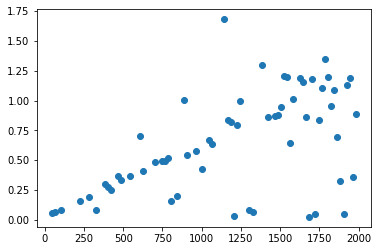

In [25]:
lookupnp = np.array(lookup)
lookuptime= lookupnp[lookupnp[:,2]<2.22]
plt.scatter(lookuptime[:,0], lookuptime[:,1])
plt.show()

- Its is clear here that, time taken for lower values of batch is lower, but as the size increases, the time taken also increases. 
- If we notice the scattering points are more concentrated towards higher value of batch size, this indicate that when batch size was lower, more values got thresholded, meaning we got more optimal losses when batch size was high.

Now lets ignore the time, we will now look at loss again. 

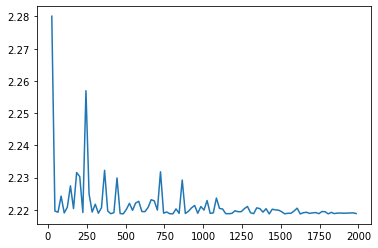

In [26]:
plt.plot(lookupnp[1:,0], lookupnp[1:,-1])
plt.show()

- Its clearly visible here, that even though, loss is at good value for lower values of batch sizes, once the batch sizes are too large, the loss is going to be more likely to reach optimal values. 
- This doesn't mean batch size should be small. 


Final words on Optimal batch size
- The optimal batch size is the one that suits you.
- If you want better time, and a good solution(but not a very good or best solution) you can go with smaller batches
- If you need very good solutions but can accept more time, larger batches or batch descent works
- A batch value in middle can also be chosen as a middle ground

==================================================================================================

## Question 2) Probablity problem on  Bayesian network
Below is the image. Click on it to see full sized.
<a href="https://ibb.co/1zcG08K"><img src="https://i.ibb.co/1zcG08K/image.png" alt="image" border="0"></a>
#### i) We need to Find probablity that someone has both cold and a fever


$ P(Cold=T) = 0.02 $

$ P(Fever=T | Cold=T) = 0.307 $

Now we know Bayes Theorem is given as $$ P(A | B) = \frac {P(A \cap B)}  {P(B)} $$

We need to find $P(Fever=T \cap Cold=T)$. 

Thus $ P(Fever=T \cap Cold=T) = P(Fever=T | Cold=T) * P(Cold=T) = 0.02 * 0.307 = 0.00614 $

#### ii) Find the probability that someone who has a cough has a cold
We need to find $ P(Cold | Cough) $ <br/>
We can see to find $ P(Cold) $, we also need $ P(Lung Disease) $. So we will calculate this first <br/>
$ P(Lung Disease=T) = P(Smokes=T) * P(Lung Disease=T|Smokes=T) + P(Smokes=F) * P(Lung Disease=T| Smokes=F) $ <br/>
$ P(Lung Disease=T) = 0.2 * 0.1009 + 0.8 * 0.001 $ <br/>
$ P(Lung Disease=T) = 0.02098 $ <br/>
Also $ P(Lung Disease=F) = 1 - P(Lung Disease=T) = 1 - 0.02098 = 0.97902$ <br/><br/>
Now we need to find, <br/>$ P(Cough=T) =$<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;$P(Cough=T/Lung Disease=T, Cold=T)* P(Lung Disease=T) * P(Cold=T) +$<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;$P(Cough=T/Lung Disease=T, Cold=F)* P(Lung Disease=T) * P(Cold=F) +$<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;$P(Cough=T/Lung Disease=F, Cold=T)* P(Lung Disease=F) * P(Cold=T) +$<br/>
&emsp;&emsp;&emsp;&emsp;&emsp;$P(Cough=T/Lung Disease=F, Cold=F)* P(Lung Disease=F) * P(Cold=F) +$<br/><br/>
$ P(Cough=T) = 0.7525*0.02*0.02098 + 0.505*0.02098*0.98 + 0.505*0.97902*0.02 + 0.01*0.970902*0.98 = 0.0301 $ 

Now we find $P(Cold=T|Cough=T)= $ <br/> 
$\frac{P(Cough=T|Lung Disease=T,Cold=T)*P(Lung Disease=T)*P(Cold=T) + P(Cough=T|Lung Disease=F,Cold=T)*P(Lung Disease=T)*P(Cold=T)}{P(Cough=T)}$
<br/><br/>
$P(Cold=T|Cough=T)= \frac{0.7525*0.02*0.02098 + 0.505*0.97902*0.02}{0.0301} = 0.3389$


## Question 3) Derive MLE for the parameters of a k-sided multinomial distribution

Multinomial distribution is a generalization of the binomial distribution. Instead of 2 outcomes like in binomial distribution, we will have multiple outcomes. Eg) It models the probablity of counts for each side of a k-sided dice is tossed n times. <br/>
A multinomial experiment has following properties:
- The experiment consist of n repeated trials.
- Each trial has discrete number(k) of possible outcomes.
- On any given trial, the probablity of particular outcome will be constant.
- The trials are independent.


#### Derivation:
Consider distribution with $k$-sided outcomes, and n trials. $X_1, X_2 ... X_k$ be the count of the $k$ possible outcomes respectively.
Probablity of each $k$ possible outcome is $P_i$.<br/>
Thus since there are a total of $n$ trials, $$ \sum_1^k X_{i} = n $$<br/>
Also individual probablities should also sum up to 1. $$ \sum_1^k P_i = 1 $$ <br/>
Probablity function of Multinomial distribution is given as <br/>
$$P(X_1=x_1, .. X_k=x_k) = \frac{n!}{\prod_1^k{x_i}} \prod_1^k p_i^{x_i} $$
Now for this, let us consider the Log likelyhood that is to be maximized<br/>
$$ L(p) = log(\frac{n!}{\prod_1^k{x_i}} \prod_1^k p_i^{x_i}) $$
$$ L(p) = log(n!) - \sum_1^k{log(x_i!)} + \sum_1^k x_ilog(p_i)$$


We have to maximize this likelyhood, but we also need to consider the constrain $ \sum_1^k P_i = 1 $ so we will have to use lagrange multiplier.<br/>
$$L'(p,\lambda) = L(p) + \lambda(1-\sum_1^k P_{i})$$
By posing derative to 0 for all p to find $ arg max_pL'(p,\lambda) $, we get <br/>
$$ \frac{\partial L'(p,\lambda)}{\partial p_i} = \frac{\partial}{\partial p_i}L(p)+ \frac{\partial}{\partial p_i}\lambda(1-\sum_1^k p_i) = 0$$
$$  \frac{\partial}{\partial p_i}\sum_1^k{x_ilogp_i} + \lambda(\frac{\partial}{\partial p_i}1-\frac{\partial}{\partial p_i}\sum_1^k p_i)=0 $$
$$ \frac{x_i}{p_i} - \lambda = 0$$
$$ x_i= {\lambda}{p_i} $$
Now we know: $$\sum_1^k{x_i} =  \lambda\sum_1^k{p_i} $$
$$ n = \lambda $$
Thus:
$$ p_i = \frac{x_i}{n} $$
Thus the parameters that maximises the likelyhood is given as 
$$ p = (\frac{x_i}{n},..,\frac{x_k}{n}) $$